<a href="https://colab.research.google.com/github/RafaelNovais/CT5148-Ai/blob/master/Stress_Predict_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
from pandas.core.arrays.datetimelike import mode
import pandas as pd
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz
!pip install graphviz
!apt-get install graphviz


"""
Rafael Novais de Melo
2324-CT5170 Principles of Machine Learning
23113607

Understanding the Dataset
Supervised Classification becasue the data is binary ad we can do a predict and training with the data we have
The appropriate machine learning category for solving the problem of predicting stress levels is Linear Regression .
You can treating the stress level as a continuous numerical variable and predict a numerical value representing the stress level,
can provide a quantitative estimate of stress, allowing for a more fine-grained understanding of stress levels.

Data Exploration
Can not be considered imbalanced because the proportion is:
Data
0    0.672802
1    0.327198
Test
0    0.671782
1    0.328218
Train
0    0.673239
1    0.326761

Choosing an ML Package
Panda to read and use the files
Scikit Learn to use classification algorithms, decision trees, random forests, support vector machines, linear regression
Matplotlib and seaborn  to data visualization and scientific plotting
numpy to organize the data and math


Data Pre-processing
Remove the rowns are empty
set the data in a dataframe
find the base line to compare the accuracy


Algorithm Selection and Application



"""
###Data Pre-processing
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data.csv")
dataTest = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/test.csv")
dataTrain = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/train.csv")
data = pd.DataFrame(data)
data = data.dropna()
dataTest = pd.DataFrame(dataTest)
dataTest = dataTest.dropna()
dataTrain = pd.DataFrame(dataTrain)
dataTrain = dataTrain.dropna()

x_data = data[["HR","respr"]]
y_data = data["Label"]
x_test = dataTest[["HR","respr"]]
y_test = dataTest["Label"]
x_train = dataTrain[["HR","respr"]]
y_train = dataTrain["Label"]


###Data Exploration
propor_data = y_data.value_counts()/len(x_data)
propor_test = y_test.value_counts()/len(x_test)
propor_train = y_train.value_counts()/len(x_train)


###BaseLine
base_line = np.ones(len(y_test))
model = DecisionTreeClassifier(max_depth=5)
model.fit(x_train,y_train)
base_line_accuracy = accuracy_score(y_test,base_line)
print(base_line_accuracy)

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.
0.3283347657291883


0.6817117624396171 0.6767466110531803


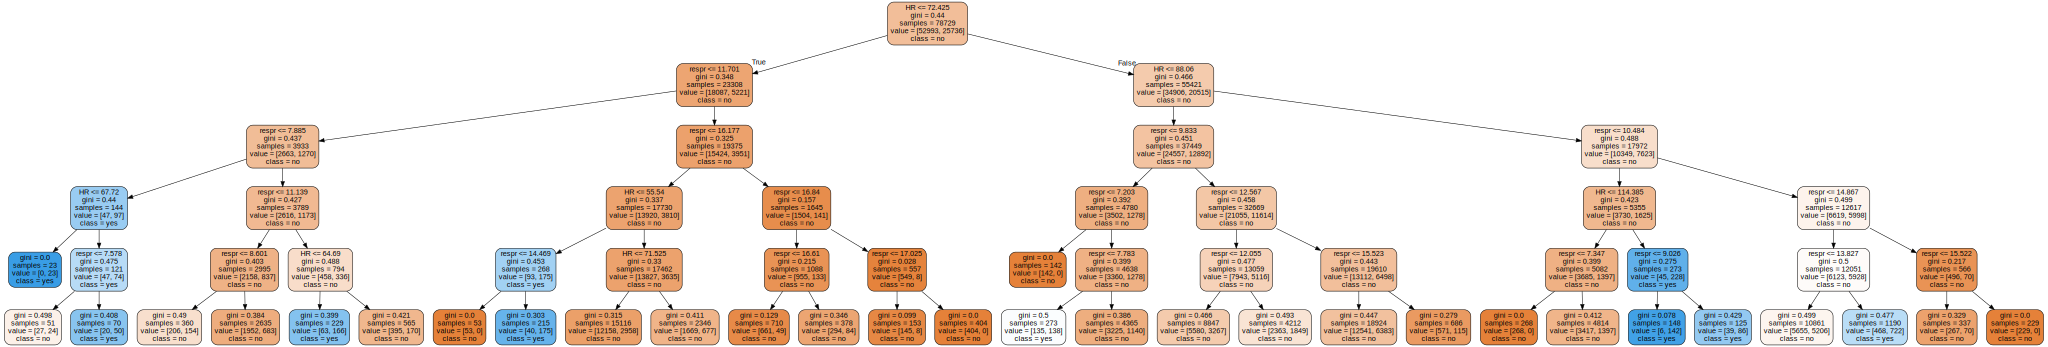

In [11]:

###Algorithm Selection and Application
##DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=5)
model.fit(x_train,y_train)
predict = model.predict(x_test)
accuracy = accuracy_score(y_test,predict)
precision = precision_score(y_test,predict)
print(accuracy, precision)
dot_data = export_graphviz(model, feature_names=x_train.columns, class_names=["no", "yes"] ,filled=True, rounded=True)
graphviz.Source(dot_data)


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.3283347657291883


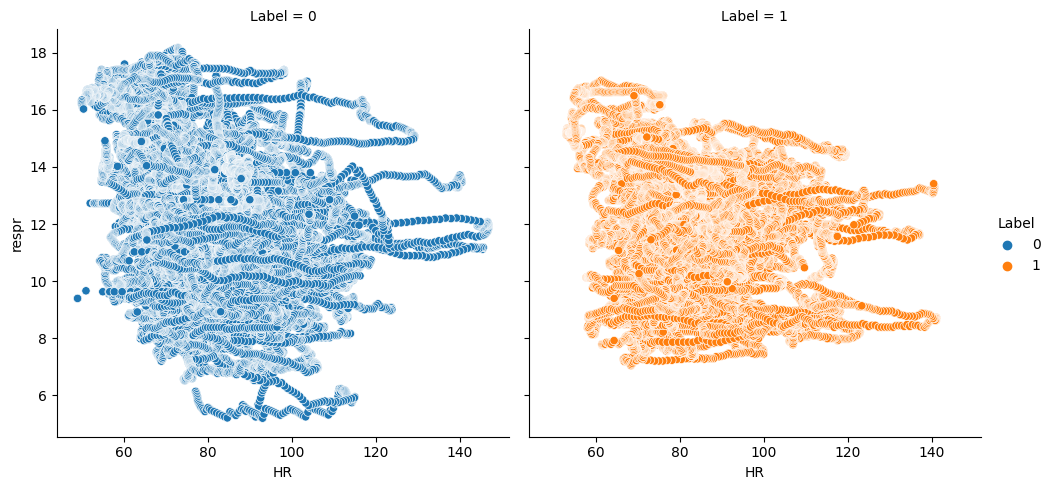

In [ ]:
###Model Evaluation
model = LinearSVC()
model.fit(x_train,y_train)
predict = model.predict(x_test)
accuracy = accuracy_score(y_test,predict)
print(accuracy)

sns.relplot(x="HR",y="respr",col="Label", hue="Label",data=data)

In [ ]:
print(accuracy)

print(propor_data )
print(propor_test )
print(propor_train)

print(data)